In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/master/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [15]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

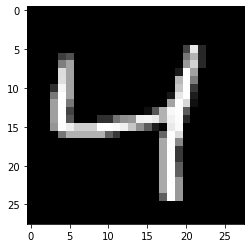

In [18]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2].reshape((28,28)),cmap="gray")

In [32]:
# Imports
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

In [20]:
# Converting the numpy data into tensor
x_train,y_train,x_test,y_test = map(torch.tensor,(x_train,y_train,x_valid,y_valid))

In [21]:
print(x_train,y_train)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])


In [38]:
n,c = x_train.shape
bs = 64
lr=1e-6
N_epochs = 100

In [28]:
# Dataloader
train_ds = TensorDataset(x_train,y_train)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

valid_ds = TensorDataset(x_test,y_test)
valid_dl = DataLoader(valid_ds, batch_size=bs * 2)

In [40]:
# Defining the network using NN module
class MnistLogistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(c,10)
    
    def forward(self,xb):
        return self.linear(xb)


In [62]:
def get_model():
    model = MnistLogistic()
    return model, torch.optim.RMSprop(model.parameters(),lr)

In [67]:
# Defining the dependencies before training
model,opt = get_model()
lossfn = F.cross_entropy

In [69]:
def loss_batch(model,lossfn,xb,yb,opt):
    pred = model(xb)
    loss = lossfn(pred,yb)
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
    return loss.item(), len(xb)


def fit(N_epochs, model, lossfn, opt, train_dl, valid_dl):
    for epoch in range(N_epochs):
        model.train()
        
        for xb,yb in train_dl:
            loss_batch(model,lossfn,xb,yb,opt)
        model.eval()

        # Validation loss
        with torch.no_grad():
            valid_loss = sum(lossfn(model(xb), yb) for xb, yb in valid_dl)
        print(epoch, valid_loss / len(valid_dl))

In [70]:
fit(N_epochs,model,lossfn,opt,train_dl,valid_dl)

0 tensor(2.2851)
1 tensor(2.2561)
2 tensor(2.2277)
3 tensor(2.1997)
4 tensor(2.1722)
5 tensor(2.1453)
6 tensor(2.1188)
7 tensor(2.0927)
8 tensor(2.0669)
9 tensor(2.0416)
10 tensor(2.0167)
11 tensor(1.9921)
12 tensor(1.9679)
13 tensor(1.9441)
14 tensor(1.9207)
15 tensor(1.8976)
16 tensor(1.8748)
17 tensor(1.8523)
18 tensor(1.8301)
19 tensor(1.8083)
20 tensor(1.7868)
21 tensor(1.7657)
22 tensor(1.7448)
23 tensor(1.7242)
24 tensor(1.7040)
25 tensor(1.6840)
26 tensor(1.6643)
27 tensor(1.6450)
28 tensor(1.6259)
29 tensor(1.6071)
30 tensor(1.5886)
31 tensor(1.5704)
32 tensor(1.5526)
33 tensor(1.5349)
34 tensor(1.5175)
35 tensor(1.5005)
36 tensor(1.4837)
37 tensor(1.4672)
38 tensor(1.4509)
39 tensor(1.4349)
40 tensor(1.4192)
41 tensor(1.4037)
42 tensor(1.3885)
43 tensor(1.3735)
44 tensor(1.3588)
45 tensor(1.3443)
46 tensor(1.3301)
47 tensor(1.3162)
48 tensor(1.3024)
49 tensor(1.2888)
50 tensor(1.2756)
51 tensor(1.2625)
52 tensor(1.2496)
53 tensor(1.2370)
54 tensor(1.2246)
55 tensor(1.2124)
56

Prediction  5


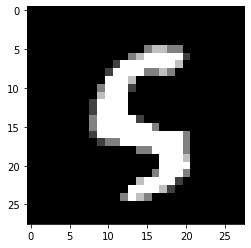

In [59]:
print("Prediction ",model(x_test[10]).detach().numpy().argmax())
plt.imshow(x_test[10].numpy().reshape((28,28)),cmap="gray")

## Using CNN